In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import precision_recall_curve

In [2]:
n = 600  # Samples
d = 1200  # Features
k = 120  # Relevant features
sigma = 1.0

In [3]:
# Generate data
np.random.seed(42)
X = np.random.normal(0, 1, size=(n, d))
w_true = np.zeros(d)
for j in range(k):
    w_true[j] = (j + 1) / k
epsilon = np.random.normal(0, sigma, n)
y = X @ w_true + epsilon

In [8]:
# λ values range
alphas = np.logspace(0, -3, 100)  

<h3>4a Number of Non-Zero Coefficients vs. λ</h3>

In [9]:
non_zero_counts = []

# Calculate the number of non-zeros coefficients
for alpha in alphas:
    lasso = LassoCV(alphas=[alpha], cv=5,  tol=1e-3)
    lasso.fit(X, y)
    w_hat = lasso.coef_
    
    non_zero_count = np.sum(w_hat != 0)
    non_zero_counts.append(non_zero_count)

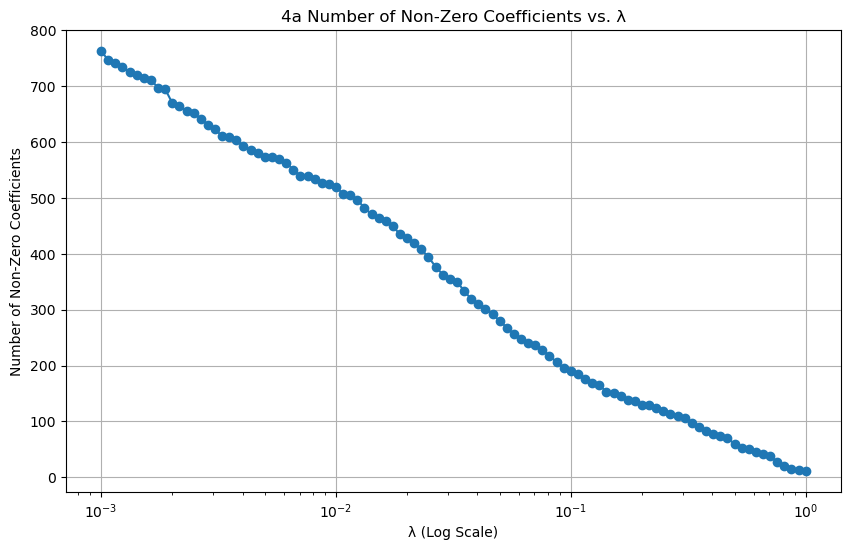

In [10]:
# 4a Plot the Number of Non-Zero Coefficients vs. λ
plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zero_counts, marker='o', linestyle='-')
plt.xlabel('λ (Log Scale)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.xscale('log')
plt.title('4a Number of Non-Zero Coefficients vs. λ')
plt.grid(True)

<h3>4c FDR vs. TPR </h3>

In [11]:
fdr_values = []
tpr_values = []

In [12]:
for alpha in alphas:
    lasso = LassoCV(alphas=[alpha], cv=5, tol=1e-3)
    lasso.fit(X, y)
    w_hat = lasso.coef_

    # Calculate FDR and TPR
    selected_features = np.where(w_hat != 0)[0]
    true_positives = np.intersect1d(selected_features, np.arange(k))
    false_positives = np.setdiff1d(selected_features, np.arange(k))
    
    if len(false_positives) > 0:
        fdr = len(false_positives) / len(selected_features)
    else:
        fdr = 0.0
    
    if len(true_positives) > 0:
        tpr = len(true_positives) / k
    else:
        tpr = 0.0
    
    fdr_values.append(fdr)
    tpr_values.append(tpr)

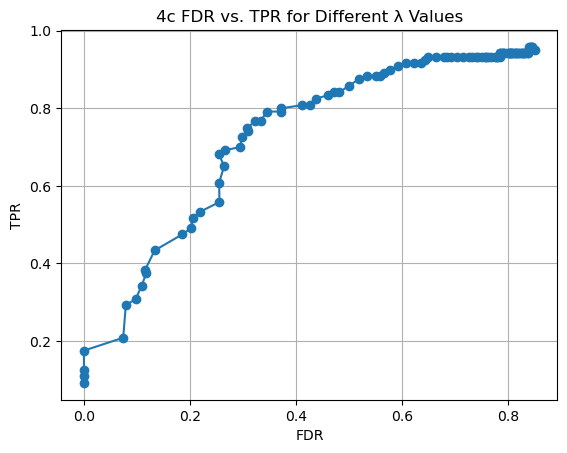

In [13]:
# 4c Plot FDR vs. TPR for each alpha
plt.plot(fdr_values, tpr_values, marker='o', linestyle='-')
plt.xlabel('FDR')
plt.ylabel('TPR')
plt.title('4c FDR vs. TPR for Different λ Values')
plt.grid(True)